In [ ]:
# 구글 드라이브에 연동하여 데이터셋 가져오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# 데이터 파일 경로 지정
file_path = '/content/drive/MyDrive/HR.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

In [ ]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# matplotlib 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

In [ ]:
# 데이터셋이 가진 컬럼들(=요인들) 출력하기
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# 1. EDA


## 1.1. 퇴직 여부 분포 확인

In [ ]:
import numpy as np
# 퇴직 여부가 yes인 사람들 분류
weight_yes = df[df['Attrition'] == 'Yes']
# 퇴직 여부가 no인 사람들 분류
weight_no = df[df['Attrition'] == 'No']

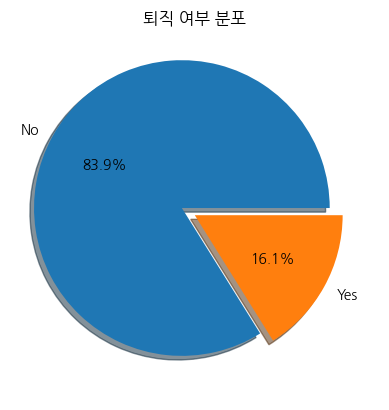

In [ ]:
# 퇴직 여부 분표를 파이차트로 출력
# 파이차트 출력을 위한 matplotlib 불러오기
import matplotlib.pyplot as plt

# 퇴직 여부 분포를 위해 퇴직 여부에 따라 그룹핑하기
pie_df = df[['Attrition', 'EmployeeNumber']].groupby(by = ['Attrition']).count()

# autopct = 숫자를 같이 출력(1.1f -> 소수 첫째점 까지)
# shadow = 그림자
# explode = 파이 떨어지게 하기
plt.pie(pie_df['EmployeeNumber'], labels=pie_df['EmployeeNumber'].index, autopct='%1.1f%%',
         shadow= True, explode=[0.1, 0])
plt.title('퇴직 여부 분포')
plt.show()


## 1.2. 집과의 거리별 퇴직 여부 확인해보기

### 1.2.1. 집과의 거리별 퇴직 여부가 뛰어난 사람들과 아닌 사람들의 분포 시각화

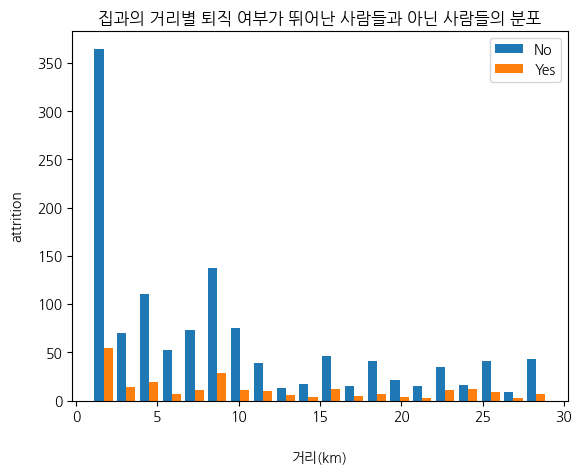

In [ ]:
# 퇴직 여부가 yes인 사람들 분류
weight_yes = df[df['Attrition'] == 'Yes']
# 퇴직 여부가 no인 사람들 분류
weight_no = df[df['Attrition'] == 'No']
# 퇴직 여부가 no인 사람들과 yes인사람들 거리에 따른 분포를 그래프 그리기
plt.hist((weight_no['DistanceFromHome'],weight_yes['DistanceFromHome']), bins=20, histtype='bar', label=['No','Yes'])
plt.title('집과의 거리별 퇴직 여부가 뛰어난 사람들과 아닌 사람들의 분포')
# x축 이름 정하기
plt.xlabel('거리(km)', labelpad=20)
# y축 이름 정하기 labelpad = 그래프와 이름의 간격
plt.ylabel('attrition', labelpad=10)
plt.legend()
plt.show()

해당 그래프를 통해 거리가 0~5km인 사람들이 제일 많은 것을 알 수 있습니다.

이는 회사 근처 자취를 하거나 회사에서 제공하는 숙소(ex 기숙사)에 거주하는 것일 수 있습니다. 해당 거리에 인원이 제일 많은 만큼 퇴사자 수도 제일 많다. 이걸로 판단하기 어렵기 때문에 퇴사 yes인 사람과 퇴사 no인 사람을 비율로 비교해야할 것 같습니다.

In [ ]:
# 거리가 같은 사람들의 누적 합계
df1 = df[['Attrition', 'DistanceFromHome']].groupby(by = ['DistanceFromHome']).count()
# 퇴사 여부가 yes인 사람들의 거리별 누적 합계
df2 = weight_yes[['Attrition', 'DistanceFromHome']].groupby(by = ['DistanceFromHome']).count()
# 조인으로 새로운 데이터프레임으로 합치기 (x= 총합, y=퇴사 yes인 사람들 합)
df_merge = pd.merge(df1, df2,how='left', on='DistanceFromHome')
# 새로운 백분율(퇴사 yes인 사람들의 거리별 분포 / 모든 사람의 거리별 분포) 만들기
df_merge['attrition(%)'] = df_merge['Attrition_y'] / df_merge['Attrition_x'] * 100
pd.DataFrame(df_merge['attrition(%)'].sort_values(ascending=False)).head()

,attrition(%)
DistanceFromHome,
24,42.857143
13,31.578947
22,31.578947
12,30.000000
27,25.000000


### 1.2.2. 단거리, 중거리, 장거리 분류 후 탐색

비율이 높은 5개를 추렸을때 0\~10km인 비율은 없고 5개 전부 10km이상에 거주하는 직원들입니다.
 - 0\~10km는 회사와 집과의 거리는 직장인들이 자전거 출근을 고려해볼만큼 단거리라고 생각하고 기준을 잡았습니다
 - 11\~20km는 같은 시\(ex : 회사 = 서울, 집 = 서울)인 중거리라고 기준을 잡았습니다.
 - 21\~30km는 다른 시\(ex: 회사 = 서울, 집 = 수도권)인 장거리라고 기준을 잡았습니다.

In [ ]:
# 10단위로 0 부터 30까지 리스트 만들기
distance_list = [i for i in range(0, 40, 10)]
# 10단위로 0 부터 20까지 리스트 만들기
label_list = [i for i in range(0, 30, 10)]

# 10km 구간별 인원수 구하기
cut = pd.cut(df['DistanceFromHome'], bins=distance_list, labels=label_list)
# 구간에 해당하는 인원 수 세기
distance_count =  cut.value_counts().sort_index()

# 퇴직 여부가 no사람들의 10km별 구간 나누기
cut_no = pd.cut(weight_no['DistanceFromHome'], bins=distance_list, labels=label_list)
# 나눈 퇴직 여부가 no인 사람들의 구간을 거리별 구간의 전체 인원으로 나눠서 비율 만들기
no_distance_count =  cut_no.value_counts().sort_index() / distance_count * 100

# 퇴직 여부가 yes사람들의 10km별 구간 나누기
cut_yes = pd.cut(weight_yes['DistanceFromHome'], bins=distance_list, labels=label_list)
# 나눈 퇴직 여부가 yes인 사람들의 구간을 거리별 구간의 전체 인원으로 나눠서 비율 만들기
yes_distance_count =  cut_yes.value_counts().sort_index() / distance_count * 100



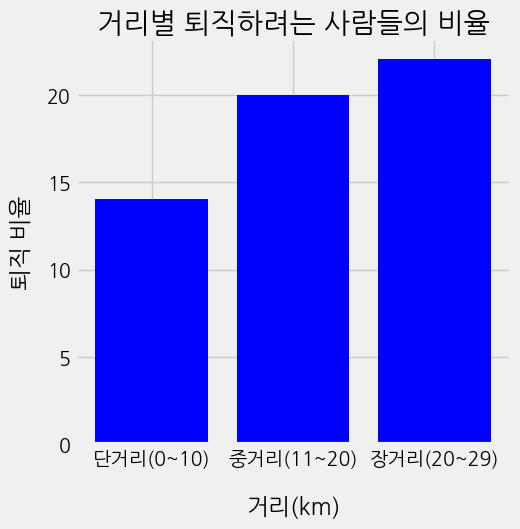

In [ ]:
distance_list = [0, 20, 30]
# 소수점 3자리에서 반올림하여 소수점 2자리까지만 출력하기
pd.options.display.float_format = '{:.2f}'.format

# 계산한 비율을 그래프로 그리기
df_merge['attrition(%)']

# 그래프 스타일 변경
plt.style.use('fivethirtyeight')
# 그래프 사이즈 변경
plt.figure(figsize=(5,5))

# x,y 변수 지정하기
x = ['단거리(0~10)','중거리(11~20)','장거리(20~29)']
# 막대 그래프 그리기, tick_label= x축 틱에 문자열을 순서대로 나타낼 수 있다
plt.bar(x, yes_distance_count, color='b', tick_label=x)

# x축 이름 정하기
plt.xlabel('거리(km)', labelpad=20)
# y축 이름 정하기 labelpad = 그래프와 이름의 간격
plt.ylabel('퇴직 비율', labelpad=10)
plt.title('거리별 퇴직하려는 사람들의 비율')
plt.show()

### 1.2.3. 간단한 분석

위 그래프를 보면 단거리는 15%이하의 사람들이 퇴직을 준비하고 있고 중거리는 20% 장거리는 22%정도의 퇴직을 생각하고 있다. 이는 거리가 멀수록 퇴직할 확률이 높다고 볼수있다. 거리가 멀면 출퇴근 시간이 길고 이로인해 업무외에 피로도가 증가하기 때문이다.

1. 이는 그러면 워라벨과도 관련이 있을까?
2. 회사에서 숙소 제공이나 근처 오피스텔이나 원룸 지원을 통해 집과의 거리를 가깝게 해주면 퇴직 비율이 감소하지 않을까?
    - 혹은 출퇴근 버스 지원

## 1.3. 월급별 퇴사 비율


### 1.3.1. 월급 구간 나누기 전처리

In [ ]:
# 월급 구간을 나누기위해 1000단위로 구간 설정하기
money_list = [i for i in range(1000, 21000, 1000)]
label_list = [i for i in range(1, 20, 1)]
# 퇴직 여부가 no사람들을 1000단위로 월급별 구간 나누기
cut_no = pd.cut(weight_no['MonthlyIncome'], bins=money_list, labels=label_list)
# 나눈 구간의 사람들 수 세기
no_money_count =  cut_no.value_counts().sort_index()

# 퇴직 여부가 yes사람들을 1000단위로 월급별 구간 나누기
cut_yes = pd.cut(weight_yes['MonthlyIncome'], bins=money_list, labels=label_list)
# 나눈 구간의 사람들 수 세기
yes_money_count =  cut_yes.value_counts().sort_index()

# 사람들을 1000단위로 월급별 구간 나누기
cut = pd.cut(df['MonthlyIncome'], bins=money_list, labels=label_list)
# 나눈 구간의 사람들 수 세기
money_count =  cut.value_counts().sort_index()

### 1.3.2. 월급 구간에 따른 퇴직 여부 yes or no 분포 시각화

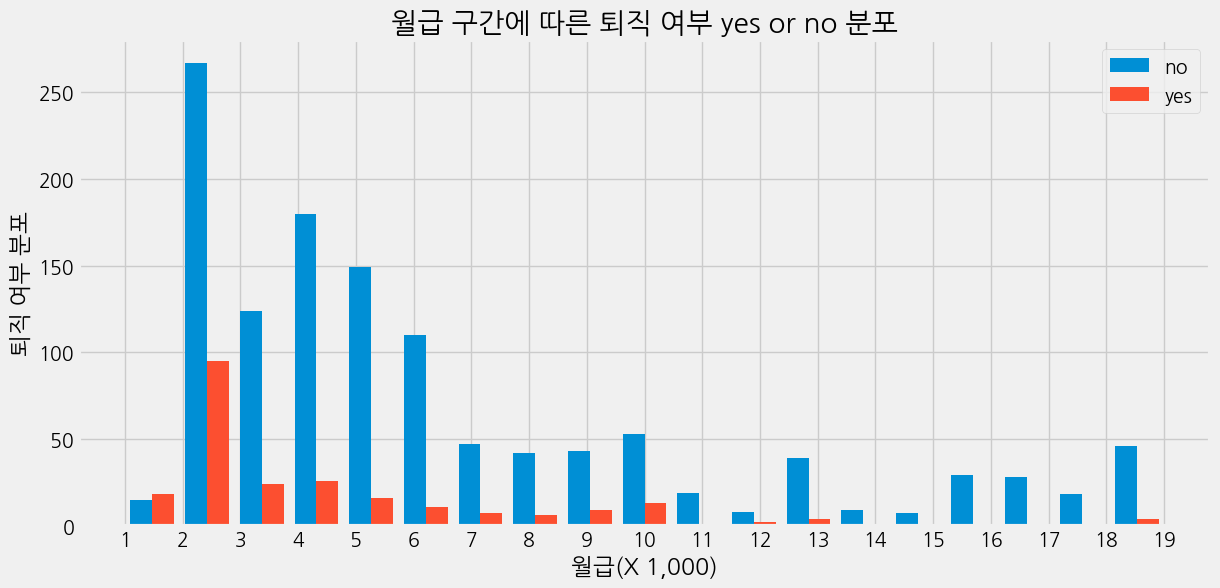

In [ ]:
# 그래프 사이즈 지정
plt.figure(figsize=(13,6))
# 퇴직 여부가 yes인 사람들과 no인 사람들을 월급 구간에 따른 분포를 그래프 그리기
plt.hist((cut_no, cut_yes), bins=19
         , histtype='bar', label=['no','yes'])
# x 축에 출력되는 값의 범위 지정
plt.xticks(np.arange(1, 19.1, 1))
# x축 y축 레이블 이름 정하기
plt.ylabel('퇴직 여부 분포')
plt.xlabel('월급(X 1,000)')
# 그래프 제목 정하기
plt.title('월급 구간에 따른 퇴직 여부 yes or no 분포')
plt.legend()
plt.show()

월급이 1,000인 사람들의 퇴사 여부가 yes인 비율이 no인 비율보다 높다.

 그 이유가 월급이 1,000~2,000인, 구간에서 제일 작은 부분인데 이는 이제 막 입사한 신입들이나 계약직, 인턴들이 해당 구간에 분포하고 이들은 계약 기간이 끝나면 계약 연장이 되지 않는한 퇴사를 해야한다.

 그리고 들어온지 얼마 안됐을때는 회사 분위기나 업무 환경 등 적응을 못하면 퇴사하는 경우가 비일비재하다. 이를 분석해보면 좋을것 같다는 생각이 든다

1. 신입의 경우 업무 환경에 대한 만족도 혹은 대인 관계 만족도에 따른 퇴사를 보면 좋을 것 같다.

### 1.3.3. 퇴직자 비율로 계산하여 탐색

In [ ]:
# 구간별 퇴사 여부가 yes인 사람들의 비율 구하기
money_per = yes_money_count / money_count * 100

# 평균 연봉 상승률 구하기
df['PercentSalaryHike'].mean()

15.209523809523809

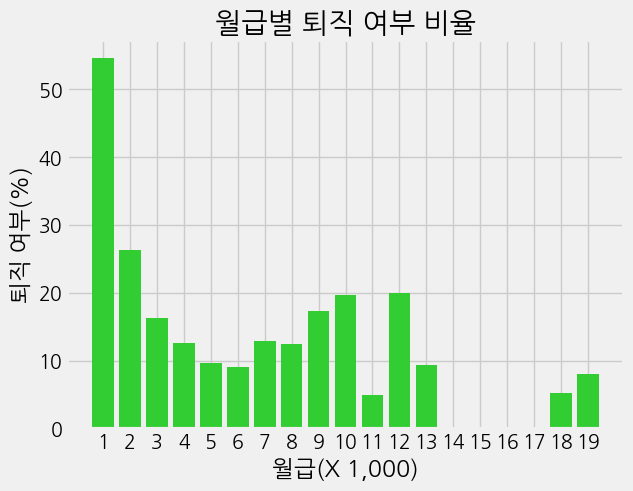

In [ ]:
# 그래프 바 그리기
plt.bar(np.arange(1, 20, 1), money_per, color = ['limegreen'])
# 그래프 x에 표시되는 내용 지정
plt.xticks(np.arange(1, 20, 1), money_per.index)
# x축 제목
plt.xlabel('월급(X 1,000)')
# y축 제목
plt.ylabel('퇴직 여부(%)')
# 그래프 제목
plt.title('월급별 퇴직 여부 비율')
plt.show()

### 1.3.4. 간단한 분석

보면 아까 예상했던대로 월급이 제일 낮은 경우 퇴사 비율이 50%를 넘는다.
- 적응 못한 신입이거나 회사랑 안맞는 신입, 계약직일수 있다.

그리고 월급이 증가할수록 퇴직비율이 낮아진다.
- 월급이 증가한다 => 경력이 쌓인다 (적응한 신입이 경력을 쌓아서 몸집을 불려간다?)

월급이 7,000을 지나고나서부터는 퇴직 비율이 다시 증가한다.
- 경력을 쌓은걸 기반으로 더 높은 월급을 주는 곳으로 이직하는 경우가 아닐까?

14,000~17,000은 퇴직자가 없다.
- 경영진, 임원급, 중요 인재로 예상

## 1.4. 업무 환경 만족도별 퇴사 비율

### 1.4.1. 업무 환경 만족도에 따른 사람들 분포 비율

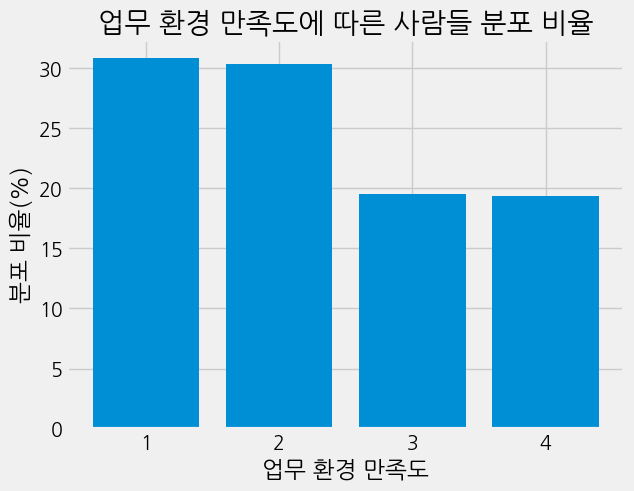

In [ ]:
# 업무 환경 만족도에 따른 분포 비율 만들기
satis = df['EnvironmentSatisfaction'].value_counts()/len(df) * 100\
# 그래프 그리기
plt.bar(np.arange(1,4.1),satis)
# x 값들 추가
plt.xticks(np.arange(1, 4.1))
# x 축 이름
plt.xlabel('업무 환경 만족도')
# y 축 이름
plt.ylabel('분포 비율(%)')
# 그래프제목
plt.title('업무 환경 만족도에 따른 사람들 분포 비율')
plt.show()

### 1.4.2. 퇴직 여부에 따른 업무 환경 만족도 분포 분류

In [ ]:
# 퇴직 여부가 yes인 사람들을 업무 환경 만족도에 따라 분류하여 인원 수 파악
yes_satis = weight_yes['EnvironmentSatisfaction'].value_counts()
# 퇴직 여부가 no인 사람들을 업무 환경 만족도에 따라 분류하여 인원 수 파악
no_satis = weight_no['EnvironmentSatisfaction'].value_counts()
# 전 직원의 업무 환경 만족도 분포 파악
all_satis = df['EnvironmentSatisfaction'].value_counts()

# 만족도 별 퇴직 여부가 yes인 사람들의 비율 구하고 데이터 프레임으로 만들기
satis_per_df = pd.DataFrame(yes_satis/all_satis * 100)
# 만족도 별 퇴직 여부가 no인 사람들의 비율 구하고 만든 데이터 프레임에 추가
satis_per_df['no_satis'] = pd.DataFrame(no_satis/all_satis * 100)
print(satis_per_df.sort_index())

   EnvironmentSatisfaction  no_satis
1                    25.35     74.65
2                    14.98     85.02
3                    13.69     86.31
4                    13.45     86.55


### 1.4.3. 시각화

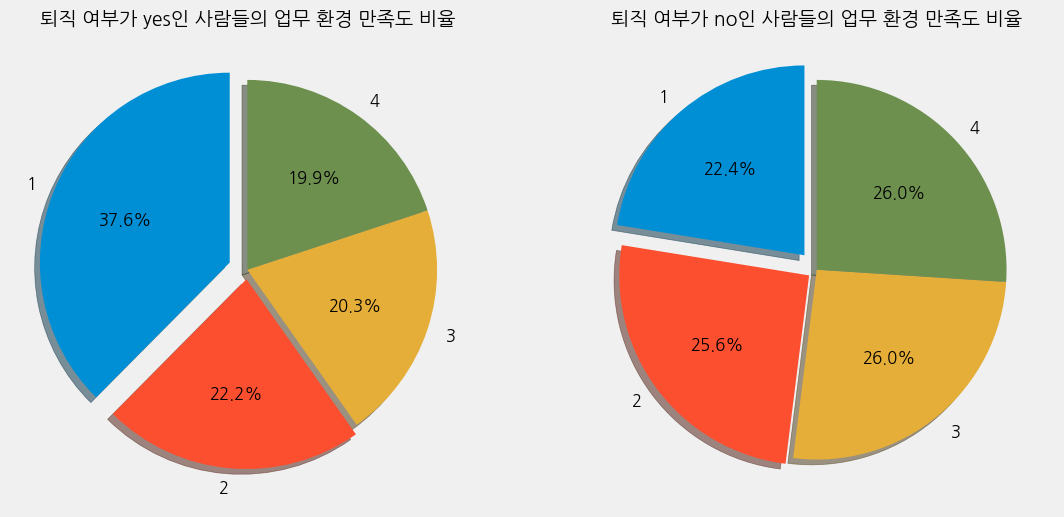

In [ ]:
# 데이터 설정
labels = ['1', '2', '3', '4']
sizes1 = satis_per_df['EnvironmentSatisfaction']
sizes2 = satis_per_df['no_satis']

# 서브 플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 첫 번째 파이 차트 그리기
plt.subplot(1, 2, 1)
ax1.pie(sizes1, labels=labels, autopct='%1.1f%%', startangle=90,explode=[0.1, 0.05,0,0],
         textprops={'fontsize': 12}, shadow=True)

ax1.set_title('퇴직 여부가 yes인 사람들의 업무 환경 만족도 비율', fontsize=14)

# 두 번째 파이 차트 그리기
plt.subplot(1, 2, 2)
ax2.pie(sizes2, labels=labels, autopct='%1.1f%%', startangle=90,explode=[0.1, 0.05,0,0],
         textprops={'fontsize': 12}, shadow=True)
ax2.set_title('퇴직 여부가 no인 사람들의 업무 환경 만족도 비율', fontsize=14)


# 그래프 표시
plt.show()

업무 환경 만족도가 퇴직을 결정하는 중요 요인이 될 수도 있음을 알 수 있다.

특히 만족도가 1인 경우의 퇴직 비율이 no인 비율보다 15% 높다 -> 엄청 큰 차이라고 생각된다.

## 1.5. 성과별 퇴사자 비율

In [ ]:
# 성과가 같은 사람들의 누적 합계
df1 = df[['Attrition', 'PerformanceRating']].groupby(by = ['PerformanceRating']).count()
# 퇴직 여부가 yes인 사람들의 성과에 따른 누적 합계
df2 = weight_yes[['Attrition', 'PerformanceRating']].groupby(by = ['PerformanceRating']).count()
# 조인으로 새로운 데이터프레임으로 합치기 (x= 총합, y=퇴직 yes 사람들 합)
df_merge = pd.merge(df1, df2,how='left', on='PerformanceRating')
# 새로운 백분율(퇴직 yes인 사람들의 성과 분포 / 모든 사람의 성과 분포) 만들기
df_merge['attrition_yes(%)'] = df_merge['Attrition_y'] / df_merge['Attrition_x'] * 100
df_merge.sort_values(by='attrition_yes(%)', ascending=False).head()

,Attrition_x,Attrition_y,attrition_yes(%)
PerformanceRating,,,
4,226,37,16.37
3,1244,200,16.08


### 1.5.1. 시각화

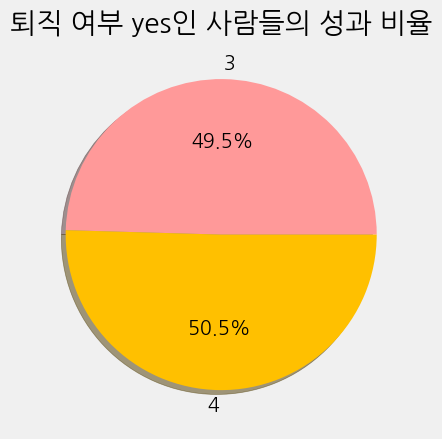

In [ ]:
# 퇴직 여부 yes인 사람들 업무 성과 분표를 파이차트로 출력

# autopct = 숫자를 같이 출력(1.1f -> 소수 첫째점 까지)
# shadow = 그림자
# explode = 파이 떨어지게 하기
plt.pie(df_merge['attrition_yes(%)'], labels=df_merge['attrition_yes(%)'].index, autopct='%1.1f%%',
         shadow= True, colors=['#ff9999', '#ffc000'])
plt.title('퇴직 여부 yes인 사람들의 성과 비율')
plt.show()

성과가 높아도 퇴직 여부가 yes인 경우가 많다 이는 성과가 퇴직 여부와 상관없다기 보다는 뛰어난 성과를 받고 이를 바탕으로 몸집을 불려 다른 곳으로 이직을 하거나 헤드헌팅을 당하는 경우가 있다고 생각한다. 주어진 데이터에서 이를 입증하기는 어려워보인다.
- 성과가 뛰어나도 퇴직 여부가 yes => 헤드헌팅 혹은 이직 하면서 몸집 키우기?

# 2. 퇴사자의 특징은 무엇인가



# 가설 세우기
- 신입에게 보장되지 않은 워라벨, 야근은 가혹한 처사인가?

## 2.1. EDA


### 2.1.1. 퇴직자들의 업무 수준 비율 파악
앞에 월급별 퇴직자들의 분포를 보다가 월급이 낮은 퇴직자들이 많은것을 확인했습니다. 월급이 낮다는 것은 신입인 경우가 많다고 생각했습니다. 그래서 신입을 판별해내기 위해 신입에게는 회사 분위기 적응이나 업무 적응을 위해 낮은 수준의 업무를 부여한다는 점을 가지고 데이터 탐색을 실시하였습니다.

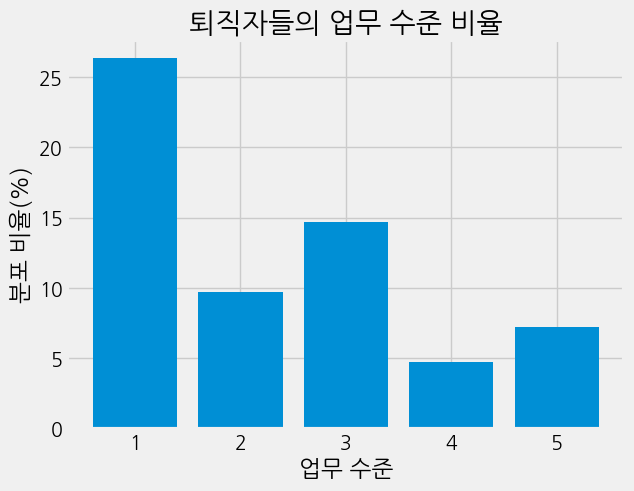

In [ ]:
# 퇴직자들의 업무 수준 비율 만들기
satis = weight_yes['JobLevel'].value_counts()/df['JobLevel'].value_counts() * 100
# 그래프 그리기
plt.bar(np.arange(1,5.1),satis)
# x 값들 추가
plt.xticks(np.arange(1, 5.1))
# x 축 이름
plt.xlabel('업무 수준')
# y 축 이름
plt.ylabel('분포 비율(%)')
# 그래프제목
plt.title('퇴직자들의 업무 수준 비율')
plt.show()

#### 2.1.1.1. 간단한 분석

그래프를 확인해본 결과 업무 수준이 1인 경우에 해당하는 퇴직자들의 비율이 25퍼센트가 넘어가는 것을 확인해볼 수 있습니다.

하지만 생각해보니 분야와 전공 및 학벌, 경력에 따라 신입들의 업무 수준이 다르다고 생각하고 업무 수준이라는 데이터도 주관적인 데이터라고 생각하여 다른것을 고민하게 되었습니다.



### 2.1.2. 근속 연도에 따른 퇴직 비율

In [ ]:
# 근속 연도가 2년 이하인 사람 분류
new_person = df[df['YearsAtCompany'] <= 2].value_counts()
# 근속 연도가 2년 이하하면서 퇴직 yes인 사람들
new_person_yes = weight_yes[weight_yes['YearsAtCompany'] <= 2]
# 직원들중 신입인 퇴직자들의 비율 파악
new_person_per = (len(new_person_yes.value_counts())/len(weight_yes)) * 100
print('퇴사자들중 입사한지 얼마 안된 사람들의 비율 :', int(new_person_per), '%')

퇴사자들중 입사한지 얼마 안된 사람들의 비율 : 43 %


In [ ]:
# 근속 연수를 나누기위해 구간 설정하기
year_list = [i for i in range(0, 42, 1)]
label_list = [i for i in range(0, 41, 1)]
# 퇴직자들 수 세기
weight_yes_11 = weight_yes[weight_yes['YearsAtCompany'] < 12]
df_11 = df[df['YearsAtCompany'] < 12]
yes_year_count =  weight_yes_11['YearsAtCompany'].value_counts().sort_index()
df_year_per = df_11['YearsAtCompany'].value_counts().sort_index()
# 퇴직자들의 구간별 분포 비율 구하기
yes_year_count_per = (yes_year_count / df_year_per) * 100
yes_year_count_per

0    36.36
1    34.50
2    21.26
3    15.62
4    17.27
5    10.71
6    11.84
7    12.22
8    11.25
9     9.76
10   15.00
11    6.25
Name: YearsAtCompany, dtype: float64

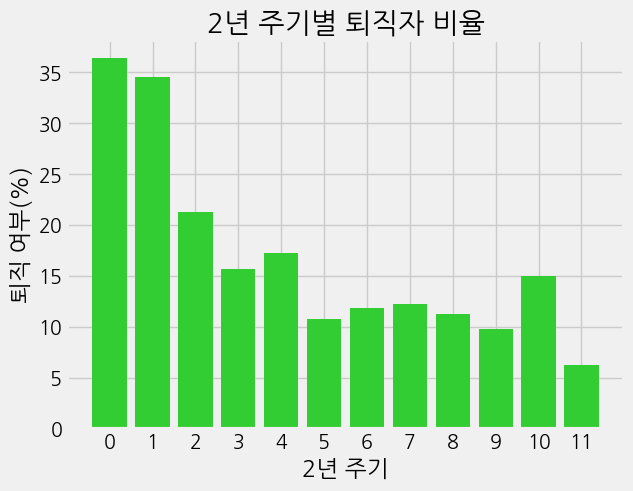

In [ ]:
# 그래프 바 그리기
plt.bar(np.arange(0, 12, 1), yes_year_count_per, color = ['limegreen'])
# 그래프 x에 표시되는 내용 지정
plt.xticks(np.arange(0, 12, 1), yes_year_count_per.index)
# x축 제목
plt.xlabel('2년 주기')
# y축 제목
plt.ylabel('퇴직 여부(%)')
# 그래프 제목
plt.title('2년 주기별 퇴직자 비율')
plt.show()

#### 2.1.2.1. 간단한 분석

근속연수에 따라 퇴직 비율이 감소하지만 10년차에 다시 증가한 이유는 퇴직금이 최대가 되는 10년차에 희망퇴직이 이루어지는 경우가 때문입니다

그리고 신규 입사자의 장기 근속여부는 입사 후 5년이 결정합니다
(출처 : https://www.labortoday.co.kr/news/articleView.html?idxno=154688)

보통 입사한지 얼마안된 사람들의 퇴사 주요 원인으로는 회사 분위기가 본인과 맞지않아 적응을 못하거나 업무가 본인과 맞지 않은 경우입니다.

1. 업무가 맞지 않은 경우 (업무 만족도, JobSatisfaction)
2. 업무 환경이 만족스럽지 않은 경우(업무 환경 만족도, EnvironmentSatisfaction)
3. 대인 관계(상사)가 마음에 들지 않은 경우 (대인관계 만족도, RelationshipSatisfaction)

4. 워라벨이 보장되지 않았을 경우 (일과 생활의 균형 정도, WorkLifeBalance /
규정외 노동시간, OverTime)


로 분리해서 볼수 있다고 생각합니다.





## 2.2. 분석 목표 설정

## 과도한 업무량과 잦은 야근으로 인한 워라벨 불균형, 신규 입사자의 퇴사를 촉진하는가?


## 2.3. 분석

### 2.3.1. EDA

연도별 야근을 경험해서 퇴직하는 사람들

In [ ]:
# 퇴사자들 분류 (근속연수 9년 이하)
weight_yes_count=weight_yes['YearsAtCompany'].value_counts().sort_index()
weight_yes_9 = weight_yes[weight_yes['YearsAtCompany'] <= 9]
weight_yes_9_per=weight_yes_9['YearsAtCompany'].value_counts().sort_index()
# 근속연수 9년이하 직원들 분류
df_count=df['YearsAtCompany'].value_counts().sort_index()
df_9 = df[df['YearsAtCompany'] <= 9]
df_9_per=df_9['YearsAtCompany'].value_counts().sort_index()
# 비율로 만들기
attri_per = weight_yes_9_per/df_9_per * 100

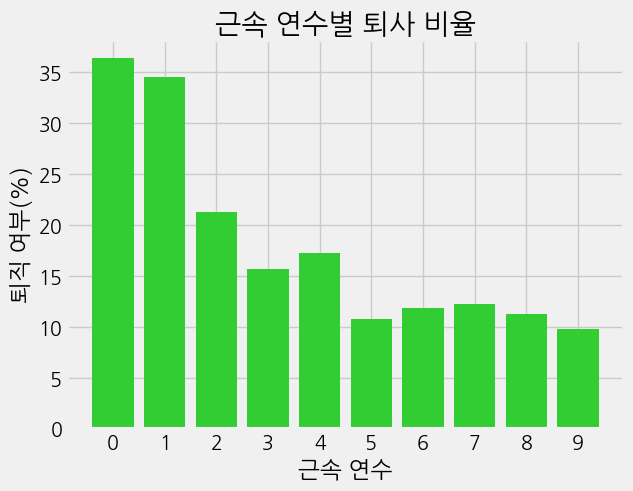

In [ ]:
plt.bar(np.arange(0, 10, 1), attri_per, color = ['limegreen'])
# 그래프 x에 표시되는 내용 지정
plt.xticks(np.arange(0, 10, 1), attri_per.index)
# x축 제목
plt.xlabel('근속 연수')
# y축 제목
plt.ylabel('퇴직 여부(%)')
# 그래프 제목
plt.title('근속 연수별 퇴사 비율')
plt.show()

#### 2.3.1.1. EDA 결과

근속 연수 5년부터 장기 근속 혜택을 받아서 혜택을 받으면서 퇴사 생각이 줄어들어 4년과 5년의 차이가 다른때보다 크지 않을까 생각합니다.

그래서 근속 연수가 0~4년차인 신규 입사자(or 신입)들의 퇴사 요인을 파악하고 이를 바탕으로 퇴사 요인을 개선하는 방안을 고민하여 퇴사율을 낮추는 것이 관건이라고 파악하였습니다.

### 2.3.2. 전처리

In [ ]:
# 야근을 경험한 퇴사하려는 사람들
yes_over = weight_yes[weight_yes['OverTime']=='Yes']
# 야근을 경험안하고 퇴사하지않는 사람들
no_over = weight_no[weight_no['OverTime']=='No']
# 근속연수에 따른 인원 수 카운트
df_count = df['YearsAtCompany'].value_counts().sort_index()
yes_over_count = yes_over['YearsAtCompany'].value_counts().sort_index()

In [ ]:
# 야근 경험한 퇴사자들 분류(근속연수 4년 이하)
yes_over_4 = yes_over[yes_over['YearsAtCompany'] <= 4]
# 야근 안한 직원들 분류(근속연수 4년 이하)
no_over_4 = no_over[no_over['YearsAtCompany'] <= 4]
# 퇴사자들 분류 (근속연수 4년 이하)
weight_yes_4 = weight_yes[weight_yes['YearsAtCompany'] <= 4]
# 근속연수 4년이하 직원들 분류
df_4 = df[df['YearsAtCompany'] <= 4]
no_4_per = len(no_over_4)/len(weight_yes_4) * 100
yes_4_per = len(yes_over_4)/len(weight_yes_4) * 100
per_list = [yes_4_per, 100-yes_4_per]
# 전체 워라벨 분포
df_WLB = df_4['WorkLifeBalance'].value_counts().sort_index()

############## 야근을 경험한 신입 퇴사자들의 워라벨정도############
# 야근을 경험하고 퇴사하려는 신규 입사자들의 워라벨 정도
yes_WLB = yes_over_4['WorkLifeBalance'].value_counts().sort_index()
# 비율로 만들기
WLB_per = yes_WLB / df_WLB * 100

############## 야근을 경험한 신입 퇴사자들의 워라벨정도############
# 야근을 경험하고 퇴사하려는 신규 입사자들의 워라벨 정도
no_WLB = no_over_4['WorkLifeBalance'].value_counts().sort_index()
# 비율로 만들기(명확한 차이를 보이기 위해 3을 나누어 y축을 맞춤)
WLB_per_no = no_WLB / df_WLB * 100 / 3
WLB_per

1   13.85
2   14.95
3   11.66
4   12.22
Name: EnvironmentSatisfaction, dtype: float64

### 2.3.3 카이제곱 검정

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# 데이터프레임 불러오기
# 여기서는 데이터프레임을 df라고 가정합니다. 실제 데이터프레임의 이름에 맞게 수정해주세요.
# df = pd.read_csv('your_data.csv')

# Attrition과 OverTime 변수 간의 분할표(contingency table) 생성
contingency_table = pd.crosstab(df['Attrition'], df['OverTime'])

# 카이제곱 검정 실행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 87.56429365828768
p-value: 8.15842372153832e-21
Degrees of freedom: 1
Expected frequencies table:
[[884.06938776 348.93061224]
 [169.93061224  67.06938776]]


#### 2.3.3.1. 카이제곱 검정 결과
카이제곱 통계량은 약 87.56이고, p-value는 8.16e-21입니다. 유의수준(0.05)보다  작은 p-value로 귀무가설을 기각한다는 것을 의미합니다. 따라서 Attrition과 OverTime 사이에는 통계적으로 유의한 관계가 있다고 할 수 있습니다.

## 2.3.4. 시각화

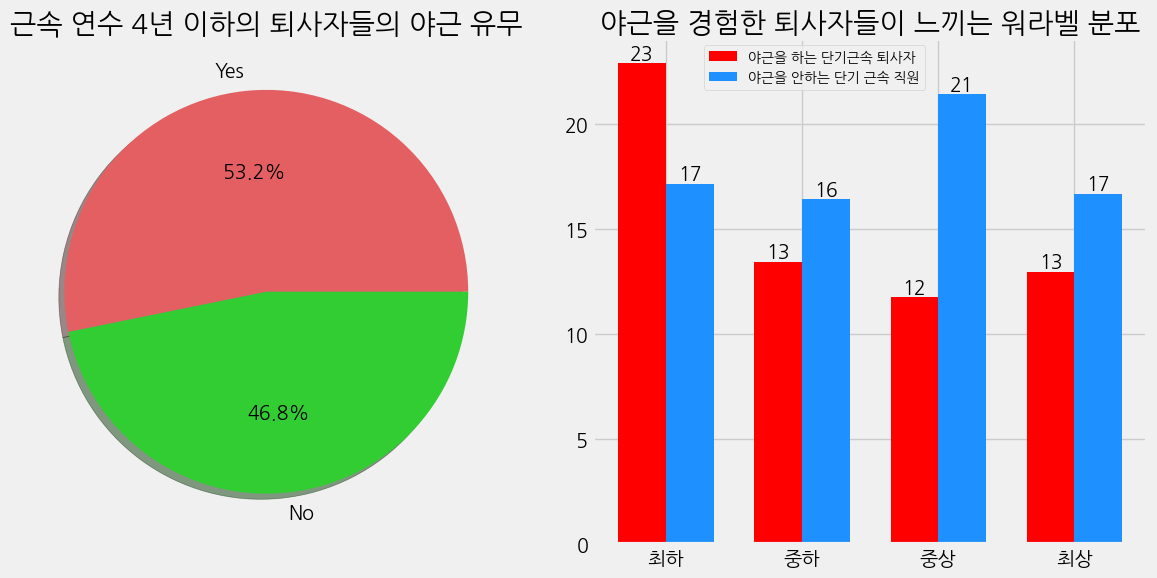

In [ ]:
# 시각화 크기 정하기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 그래프 바 그리기
plt.subplot(1, 2, 1)
# autopct = 숫자를 같이 출력(1.1f -> 소수 첫째점 까지)
# shadow = 그림자
# explode = 파이 떨어지게 하기
plt.pie(per_list, labels=['Yes', 'No'], autopct='%1.1f%%',
         shadow= True, colors=['#e35f62', 'limegreen'])
plt.title('근속 연수 4년 이하의 퇴사자들의 야근 유무')


# 야근한 신입 퇴사자들 분포를 파이차트로 출력
plt.subplot(1, 2, 2)
# 그룹의 레이블 설정
labels = ['최하','중하','중상','최상']
# 막대의 너비 설정
bar_width = 0.35
index = np.arange(len(labels))

# A 그룹과 B 그룹의 막대 그래프 생성
bars1 = plt.bar(index, WLB_per, color='r', label='야근을 하는 신규 입사자 퇴사자', width=bar_width, align='center')
bars2 = plt.bar(index + bar_width, WLB_per_no, color='dodgerblue', label='야근을 안하는 신규 입사자 직원', width=bar_width, align='center')

# 막대 위에 값을 표시
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:.0f}'.format(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:.0f}'.format(yval), ha='center', va='bottom')

# x축 레이블 설정
plt.xticks(index + bar_width / 2, labels)
# 제목 정하기
plt.title('야근을 경험한 퇴사자들이 느끼는 워라벨 분포')
# 범례 표시
plt.legend(loc = (0.2,0.9),fontsize=10)

# 여백 없이 그림 합치기
plt.tight_layout()
plt.show()

## 2.4. 분석 결과
- 근속 연수가 4년 이하 직원의 퇴사 비율이 전체 퇴사자들 중 43% 입니다.​

- 단기 근속 퇴사자들 중 절반 이상이 야근을 경험했습니다​

- 단기 근속 퇴사자들은 야근을 하면 워라벨이 보장받지 못한다고 생각하고 퇴사의 주요 원인이라고 판단됩니다.​

- 야근을 안하는 직원들은 워라벨이 보장받는다고 생각합니다.​

- 업무 환경 개선 제안 : 업무에 몰입이 가능한 환경으로 개선합니다. 향상된 업무 몰입으로 주어진 업무를 업무 시간 내에 처리할 수 있도록 하여 규정 외 노동시간에 업무를 줄이는 방안

- 유연근무제 제안 : 근무 시간과 장소를 직원 스스로 정하게 합니다. 집과의 거리가 먼 직원들에게도 출퇴근 부담을 줄이고 업무 효율 및 만족도를 향상시켜 워라벨을 보장하는 방안

### sklearn으로 검증하기

In [ ]:
from sklearn.linear_model import LogisticRegression

# Overtime과 YearsAtCompany를 독립 변수로 사용
X = df[['OverTime', 'YearsAtCompany']]
# Attrition을 종속 변수로 사용
y = df['Attrition']

# Overtime 열에 대한 더미 변수 생성 (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# 로지스틱 회귀 모델 초기화 및 학습
model = LogisticRegression()
model.fit(X, y)

# 계수 확인
print("Coefficients:", model.coef_)

# 예측
# 예측할 때 새로운 데이터로 바꾸어야 함
# 새로운 데이터에서 Overtime이 "Yes"이고 YearsAtCompany가 낮을 때 Attrition이 "Yes"일 가능성을 예측할 수 있음

Coefficients: [[-0.07991935  1.30722813]]


'YearsAtCompany'의 계수는 약 -0.0799로, 이는 회사에서의 근속 기간이 증가할수록 Attrition 발생 가능성이 감소한다는 것을 나타냅니다.

'Overtime'의 계수는 약 1.3072로, 이는 잔업을 할수록 Attrition 발생 가능성이 증가한다는 것을 나타냅니다.

따라서, 'Overtime'이 'Yes'인 경우에 'YearsAtCompany'가 작을수록 Attrition 발생 가능성이 높아진다는 것을 회귀분석 결과가 시사하는 것입니다. 이러한 해석을 통해 잔업과 근속 기간이 Attrition 발생에 영향을 미치는 방향과 크기를 파악할 수 있습니다.


# 심화 과제
심화 과제가 가설세우고 데이터로 검증하기 였는데 퇴직요인을 발굴하는 과정에서 가설을 세우고 이를 분석하였습니다.

 보고서를 작성하는 방식으로 진행해서 다른 가설을 세우고 진행해야하는지 아니면 심화과제를 충족한 분석을 한것인지 몰라서 분석에 세운 가설을 추가하여 제출합니다